# AMOCarray demo

The purpose of this notebook is to demonstrate the functionality of `AMOCarray`.

The demo is organised to show

- Step 1: Loading and plotting a sample dataset

- Step 2: Exploring the dataset attributes and variables.

Note that when you submit a pull request, you should `clear all outputs` from your python notebook for a cleaner merge.


In [1]:
import pathlib
import sys

script_dir = pathlib.Path().parent.absolute()
parent_dir = script_dir.parents[0]
sys.path.append(str(parent_dir))

import importlib

import xarray as xr
import os
from amocarray import readers, plotters, standardise, utilities

In [2]:
# Specify the path for writing datafiles
data_path = os.path.join(parent_dir, "data")

### Load RAPID 26°N

In [3]:
# Load data from data/moc_transports
ds_rapid = readers.load_sample_dataset()
ds_rapid = standardise.standardise_rapid(ds_rapid, ds_rapid.attrs["source_file"])

datasetsRAPID = readers.load_dataset("rapid", transport_only=False)
standardRAPID = [
    standardise.standardise_rapid(ds, ds.attrs["source_file"]) for ds in datasetsRAPID
]
ds_rapid


20250418T065936 INFO     setup_logger Logger initialized for array: rapid, writing to /home/runner/work/amocarray/amocarray/logs/RAPID_20250418T06_read.log


20250418T065936 INFO     load_dataset Loading dataset for array: rapid


20250418T065936 INFO     read_rapid Starting to read RAPID dataset


20250418T065936 INFO     resolve_file_path Using cached file: /home/runner/work/amocarray/amocarray/data/moc_transports.nc


20250418T065936 INFO     read_rapid Opening RAPID dataset: /home/runner/work/amocarray/amocarray/data/moc_transports.nc


20250418T065936 INFO     read_rapid Attaching metadata to RAPID dataset from file: moc_transports.nc


20250418T065936 INFO     read_rapid Successfully loaded 1 RAPID dataset(s)


20250418T065936 INFO     load_dataset Successfully loaded 1 dataset(s) for array: rapid


20250418T065936 INFO     _summarise_datasets 
Summary for array 'rapid':
Total datasets loaded: 1

Dataset 1:
  Source file: moc_transports.nc
  Time coverage: TIME variable not found
  Dimensions:
    - time: 13779
  Variables:
    - t_therm10: shape (13779,)
    - t_aiw10: shape (13779,)
    - t_ud10: shape (13779,)
    - t_ld10: shape (13779,)
    - t_bw10: shape (13779,)
    - t_gs10: shape (13779,)
    - t_ek10: shape (13779,)
    - t_umo10: shape (13779,)
    - moc_mar_hc10: shape (13779,)



20250418T065936 DEBUG    standardise_array Standardising moc_transports.nc for RAPID


20250418T065936 DEBUG    merge_metadata_aliases Renaming key 'Title' → 'title'


20250418T065936 DEBUG    merge_metadata_aliases Renaming key 'Institution' → 'institution'


20250418T065936 DEBUG    merge_metadata_aliases Renaming key 'Website' → 'web_link'


20250418T065936 DEBUG    merge_metadata_aliases Renaming key 'Acknowledgement' → 'acknowledgement'


20250418T065936 DEBUG    merge_metadata_aliases Renaming key 'Created_by' → 'creator_name'


20250418T065936 DEBUG    merge_metadata_aliases Renaming key 'Creation_date' → 'date_created'


20250418T065936 DEBUG    merge_metadata_aliases Renaming key 'Principle_investigator' → 'principal_investigator'


20250418T065936 DEBUG    merge_metadata_aliases Renaming key 'Principle_investigator_email' → 'principal_investigator_email'


20250418T065936 DEBUG    merge_metadata_aliases Renaming key 'DOI' → 'doi'


20250418T065936 DEBUG    merge_metadata_aliases Conflict for 'web_link' from 'web_link'; keeping first value


20250418T065936 DEBUG    merge_metadata_aliases Renaming key 'note' → 'comment'


20250418T065936 DEBUG    merge_metadata_aliases Renaming key 'weblink' → 'web_link'


20250418T065936 DEBUG    merge_metadata_aliases Conflict for 'web_link' from 'weblink'; keeping first value


20250418T065936 DEBUG    merge_metadata_aliases Conflict for 'comment' from 'comment'; keeping first value


20250418T065936 DEBUG    merge_metadata_aliases Skipped duplicate (identical) key 'acknowledgement' → 'acknowledgement'


20250418T065936 DEBUG    merge_metadata_aliases Renaming key 'platform_type' → 'platform'


20250418T065936 DEBUG    merge_metadata_aliases Skipped duplicate (identical) key 'creator_name' → 'creator_name'


20250418T065936 DEBUG    merge_metadata_aliases Conflict for 'institution' from 'institution'; keeping first value


20250418T065936 DEBUG    merge_metadata_aliases Conflict for 'doi' from 'doi'; keeping first value


20250418T065936 DEBUG    _consolidate_contributors Starting _consolidate_contributors with attrs: {'title': 'RAPID MOC timeseries', 'institution': 'National Oceanography Centre,UK', 'web_link': 'http://www.rapid.ac.uk/', 'acknowledgement': 'The RAPID-MOC monitoring project is funded by the Natural Environment Research Council and data is freely available from www.rapid.ac.uk/', 'creator_name': 'Ben Moat', 'date_created': '17-Sep-2024', 'principal_investigator': 'Ben Moat', 'principal_investigator_email': 'ben.moat@noc.ac.uk', 'doi': 'doi: 10.5285/223b34a32dc5c945e0637086abc0f274', 'source_file': 'moc_transports.nc', 'source_path': '/home/runner/work/amocarray/amocarray/data/moc_transports.nc', 'description': 'RAPID 26N transport estimates dataset', 'project': 'RAPID-AMOC 26°N array', 'comment': 'Dataset accessed and processed via xarray', 'data_product': 'RAPID layer transport time series', 'program': 'RAPID', 'license': 'CC-BY 4.0', 'featureType': 'timeSeries', 'Conventions': 'CF-1.8,

20250418T065936 DEBUG    _consolidate_contributors Email buckets: {'principal_investigator_email': ['ben.moat@noc.ac.uk'], 'creator_email': ['ben.moat@noc.ac.uk']}


20250418T065936 DEBUG    _consolidate_contributors URL buckets: {}


20250418T065936 DEBUG    _consolidate_contributors Names: ['Ben Moat', 'Ben Moat']; Roles: ['creator', 'PI']; Sources: ['creator_name', 'principal_investigator']


20250418T065936 DEBUG    _consolidate_contributors Set contributor_name='Ben Moat, Ben Moat', contributor_role='creator, PI'


20250418T065936 DEBUG    _consolidate_contributors Aligned contributor_email='ben.moat@noc.ac.uk, ben.moat@noc.ac.uk'


20250418T065936 DEBUG    _consolidate_contributors Aligned contributor_id=', '


20250418T065936 DEBUG    _consolidate_contributors Matched institution 'National Oceanography Centre\xa0(Southampton) (UK)' → 'national oceanography centre (southampton) (uk)' → 'https://edmo.seadatanet.org/report/17'


20250418T065936 DEBUG    _consolidate_contributors Finished _consolidate_contributors: {'title': 'RAPID MOC timeseries', 'web_link': 'http://www.rapid.ac.uk/', 'acknowledgement': 'The RAPID-MOC monitoring project is funded by the Natural Environment Research Council and data is freely available from www.rapid.ac.uk/', 'date_created': '17-Sep-2024', 'doi': 'doi: 10.5285/223b34a32dc5c945e0637086abc0f274', 'source_file': 'moc_transports.nc', 'source_path': '/home/runner/work/amocarray/amocarray/data/moc_transports.nc', 'description': 'RAPID 26N transport estimates dataset', 'project': 'RAPID-AMOC 26°N array', 'comment': 'Dataset accessed and processed via xarray', 'data_product': 'RAPID layer transport time series', 'program': 'RAPID', 'license': 'CC-BY 4.0', 'featureType': 'timeSeries', 'Conventions': 'CF-1.8, ACDD-1.3', 'time_coverage_start': '2004-04-01', 'time_coverage_end': '2023-12-31', 'platform': 'Mooring array', 'summary': 'RAPID 26N transport estimates dataset', 'contributor_nam

20250418T065936 DEBUG    normalize_and_add_vocabulary Normalized 'platform': 'Mooring array' → 'mooring'


20250418T065936 DEBUG    normalize_and_add_vocabulary Added vocabulary for 'platform': https://vocab.nerc.ac.uk/collection/L06/


20250418T065936 DEBUG    normalize_and_add_vocabulary Added vocabulary for 'featureType': https://cfconventions.org/cf-conventions/v1.6.0/cf-conventions.html#_features_and_feature_types


20250418T065936 INFO     setup_logger Logger initialized for array: rapid, writing to /home/runner/work/amocarray/amocarray/logs/RAPID_20250418T06_read.log


20250418T065936 INFO     load_dataset Loading dataset for array: rapid


20250418T065936 INFO     read_rapid Starting to read RAPID dataset


20250418T065936 INFO     resolve_file_path Using cached file: /home/runner/work/amocarray/amocarray/data/moc_vertical.nc


20250418T065936 INFO     read_rapid Opening RAPID dataset: /home/runner/work/amocarray/amocarray/data/moc_vertical.nc


20250418T065936 INFO     read_rapid Attaching metadata to RAPID dataset from file: moc_vertical.nc


20250418T065936 INFO     resolve_file_path Downloading file from https://rapid.ac.uk/sites/default/files/rapid_data/ts_gridded.nc to /home/runner/work/amocarray/amocarray/data


Summary for array 'rapid':
Total datasets loaded: 1

Dataset 1:
  Source file: moc_transports.nc
  Time coverage: TIME variable not found
  Dimensions:
    - time: 13779
  Variables:
    - t_therm10: shape (13779,)
    - t_aiw10: shape (13779,)
    - t_ud10: shape (13779,)
    - t_ld10: shape (13779,)
    - t_bw10: shape (13779,)
    - t_gs10: shape (13779,)
    - t_ek10: shape (13779,)
    - t_umo10: shape (13779,)
    - moc_mar_hc10: shape (13779,)



20250418T065958 INFO     read_rapid Opening RAPID dataset: /home/runner/work/amocarray/amocarray/data/ts_gridded.nc


20250418T065958 INFO     read_rapid Attaching metadata to RAPID dataset from file: ts_gridded.nc


20250418T065958 INFO     resolve_file_path Using cached file: /home/runner/work/amocarray/amocarray/data/moc_transports.nc


20250418T065958 INFO     read_rapid Opening RAPID dataset: /home/runner/work/amocarray/amocarray/data/moc_transports.nc


20250418T065958 INFO     read_rapid Attaching metadata to RAPID dataset from file: moc_transports.nc


20250418T065958 INFO     read_rapid Successfully loaded 3 RAPID dataset(s)


20250418T065958 INFO     load_dataset Successfully loaded 3 dataset(s) for array: rapid


20250418T065958 INFO     _summarise_datasets 
Summary for array 'rapid':
Total datasets loaded: 3

Dataset 1:
  Source file: moc_vertical.nc
  Time coverage: TIME variable not found
  Dimensions:
    - time: 13779
    - depth: 307
  Variables:
    - stream_function_mar: shape (307, 13779)

Dataset 2:
  Source file: ts_gridded.nc
  Time coverage: TIME variable not found
  Dimensions:
    - time: 13779
    - depth: 242
  Variables:
    - pressure: shape (242,)
    - TG_west: shape (242, 13779)
    - SG_west: shape (242, 13779)
    - TG_wb3: shape (242, 13779)
    - SG_wb3: shape (242, 13779)
    - TG_east: shape (242, 13779)
    - SG_east: shape (242, 13779)
    - TG_marwest: shape (242, 13779)
    - SG_marwest: shape (242, 13779)
    - TG_mareast: shape (242, 13779)
    - SG_mareast: shape (242, 13779)
    - TG_west_flag: shape (242, 13779)
    - SG_west_flag: shape (242, 13779)
    - TG_east_flag: shape (242, 13779)
    - SG_east_flag: shape (242, 13779)
    - TG_marwest_flag: shape (2

20250418T065958 DEBUG    standardise_array Standardising moc_vertical.nc for RAPID


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'Title' → 'title'


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'Institution' → 'institution'


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'Website' → 'web_link'


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'Acknowledgement' → 'acknowledgement'


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'Created_by' → 'creator_name'


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'Creation_date' → 'date_created'


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'Principle_investigator' → 'principal_investigator'


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'Principle_investigator_email' → 'principal_investigator_email'


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'DOI' → 'doi'


20250418T065958 DEBUG    merge_metadata_aliases Conflict for 'web_link' from 'web_link'; keeping first value


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'note' → 'comment'


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'weblink' → 'web_link'


20250418T065958 DEBUG    merge_metadata_aliases Conflict for 'web_link' from 'weblink'; keeping first value


20250418T065958 DEBUG    merge_metadata_aliases Conflict for 'comment' from 'comment'; keeping first value


20250418T065958 DEBUG    merge_metadata_aliases Conflict for 'acknowledgement' from 'acknowledgement'; keeping first value


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'platform_type' → 'platform'


20250418T065958 DEBUG    merge_metadata_aliases Skipped duplicate (identical) key 'creator_name' → 'creator_name'


20250418T065958 DEBUG    merge_metadata_aliases Conflict for 'institution' from 'institution'; keeping first value


20250418T065958 DEBUG    merge_metadata_aliases Conflict for 'doi' from 'doi'; keeping first value


20250418T065958 DEBUG    _consolidate_contributors Starting _consolidate_contributors with attrs: {'title': 'RAPID streamfunction', 'institution': 'National Oceanography Centre,UK', 'web_link': 'http://www.rapid.ac.uk/', 'acknowledgement': 'The RAPID 26N AMOC monitoring project is funded by the Natural Environment Research Council and data is freely available from www.rapid.ac.uk', 'creator_name': 'Ben Moat', 'date_created': '17-Sep-2024', 'principal_investigator': 'Ben Moat', 'principal_investigator_email': 'ben.moat@noc.ac.uk', 'doi': 'doi: 10.5285/223b34a32dc5c945e0637086abc0f274', 'source_file': 'moc_vertical.nc', 'source_path': '/home/runner/work/amocarray/amocarray/data/moc_vertical.nc', 'description': 'RAPID 26N transport estimates dataset', 'project': 'RAPID-AMOC 26°N array', 'comment': 'Dataset accessed and processed via xarray', 'data_product': 'RAPID vertical streamfunction time series', 'program': 'RAPID', 'license': 'CC-BY 4.0', 'featureType': 'timeSeries', 'Conventions': 

20250418T065958 DEBUG    _consolidate_contributors Email buckets: {'principal_investigator_email': ['ben.moat@noc.ac.uk'], 'creator_email': ['ben.moat@noc.ac.uk']}


20250418T065958 DEBUG    _consolidate_contributors URL buckets: {}


20250418T065958 DEBUG    _consolidate_contributors Names: ['Ben Moat', 'Ben Moat']; Roles: ['creator', 'PI']; Sources: ['creator_name', 'principal_investigator']


20250418T065958 DEBUG    _consolidate_contributors Set contributor_name='Ben Moat, Ben Moat', contributor_role='creator, PI'


20250418T065958 DEBUG    _consolidate_contributors Aligned contributor_email='ben.moat@noc.ac.uk, ben.moat@noc.ac.uk'


20250418T065958 DEBUG    _consolidate_contributors Aligned contributor_id=', '


20250418T065958 DEBUG    _consolidate_contributors Matched institution 'National Oceanography Centre\xa0(Southampton) (UK)' → 'national oceanography centre (southampton) (uk)' → 'https://edmo.seadatanet.org/report/17'


20250418T065958 DEBUG    _consolidate_contributors Finished _consolidate_contributors: {'title': 'RAPID streamfunction', 'web_link': 'http://www.rapid.ac.uk/', 'acknowledgement': 'The RAPID 26N AMOC monitoring project is funded by the Natural Environment Research Council and data is freely available from www.rapid.ac.uk', 'date_created': '17-Sep-2024', 'doi': 'doi: 10.5285/223b34a32dc5c945e0637086abc0f274', 'source_file': 'moc_vertical.nc', 'source_path': '/home/runner/work/amocarray/amocarray/data/moc_vertical.nc', 'description': 'RAPID 26N transport estimates dataset', 'project': 'RAPID-AMOC 26°N array', 'comment': 'Dataset accessed and processed via xarray', 'data_product': 'RAPID vertical streamfunction time series', 'program': 'RAPID', 'license': 'CC-BY 4.0', 'featureType': 'timeSeries', 'Conventions': 'CF-1.8, ACDD-1.3', 'time_coverage_start': '2004-04-01', 'time_coverage_end': '2023-12-31', 'platform': 'Mooring array', 'summary': 'RAPID 26N transport estimates dataset', 'contrib

20250418T065958 DEBUG    normalize_and_add_vocabulary Normalized 'platform': 'Mooring array' → 'mooring'


20250418T065958 DEBUG    normalize_and_add_vocabulary Added vocabulary for 'platform': https://vocab.nerc.ac.uk/collection/L06/


20250418T065958 DEBUG    normalize_and_add_vocabulary Added vocabulary for 'featureType': https://cfconventions.org/cf-conventions/v1.6.0/cf-conventions.html#_features_and_feature_types


20250418T065958 DEBUG    standardise_array Standardising ts_gridded.nc for RAPID


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'Title' → 'title'


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'Institution' → 'institution'


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'Website' → 'web_link'


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'Acknowledgement' → 'acknowledgement'


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'Created_by' → 'creator_name'


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'Creation_date' → 'date_created'


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'Principle_investigator' → 'principal_investigator'


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'Principle_investigator_email' → 'principal_investigator_email'


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'DOI' → 'doi'


20250418T065958 DEBUG    merge_metadata_aliases Conflict for 'web_link' from 'web_link'; keeping first value


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'note' → 'comment'


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'weblink' → 'web_link'


20250418T065958 DEBUG    merge_metadata_aliases Conflict for 'web_link' from 'weblink'; keeping first value


20250418T065958 DEBUG    merge_metadata_aliases Conflict for 'comment' from 'comment'; keeping first value


20250418T065958 DEBUG    merge_metadata_aliases Conflict for 'acknowledgement' from 'acknowledgement'; keeping first value


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'platform_type' → 'platform'


20250418T065958 DEBUG    merge_metadata_aliases Skipped duplicate (identical) key 'creator_name' → 'creator_name'


20250418T065958 DEBUG    merge_metadata_aliases Conflict for 'institution' from 'institution'; keeping first value


20250418T065958 DEBUG    merge_metadata_aliases Conflict for 'doi' from 'doi'; keeping first value


20250418T065958 DEBUG    _consolidate_contributors Starting _consolidate_contributors with attrs: {'title': 'RAPID streamfunction', 'institution': 'National Oceanography Centre,UK', 'web_link': 'http://www.rapid.ac.uk/', 'acknowledgement': 'The RAPID 26N AMOC monitoring project is funded by the Natural Environment Research Council and data is freely available from www.rapid.ac.uk', 'creator_name': 'Ben Moat', 'date_created': '17-Sep-2024', 'principal_investigator': 'Ben Moat', 'principal_investigator_email': 'ben.moat@noc.ac.uk', 'doi': 'doi: 10.5285/223b34a32dc5c945e0637086abc0f274', 'source_file': 'ts_gridded.nc', 'source_path': '/home/runner/work/amocarray/amocarray/data/ts_gridded.nc', 'description': 'RAPID 26N transport estimates dataset', 'project': 'RAPID-AMOC 26°N array', 'comment': 'Dataset accessed and processed via xarray', 'data_product': 'RAPID gridded temperature and salinity', 'program': 'RAPID', 'license': 'CC-BY 4.0', 'featureType': 'timeSeries', 'Conventions': 'CF-1.8

20250418T065958 DEBUG    _consolidate_contributors Email buckets: {'principal_investigator_email': ['ben.moat@noc.ac.uk'], 'creator_email': ['ben.moat@noc.ac.uk']}


20250418T065958 DEBUG    _consolidate_contributors URL buckets: {}


20250418T065958 DEBUG    _consolidate_contributors Names: ['Ben Moat', 'Ben Moat']; Roles: ['creator', 'PI']; Sources: ['creator_name', 'principal_investigator']


20250418T065958 DEBUG    _consolidate_contributors Set contributor_name='Ben Moat, Ben Moat', contributor_role='creator, PI'


20250418T065958 DEBUG    _consolidate_contributors Aligned contributor_email='ben.moat@noc.ac.uk, ben.moat@noc.ac.uk'


20250418T065958 DEBUG    _consolidate_contributors Aligned contributor_id=', '


20250418T065958 DEBUG    _consolidate_contributors Matched institution 'National Oceanography Centre\xa0(Southampton) (UK)' → 'national oceanography centre (southampton) (uk)' → 'https://edmo.seadatanet.org/report/17'


20250418T065958 DEBUG    _consolidate_contributors Finished _consolidate_contributors: {'title': 'RAPID streamfunction', 'web_link': 'http://www.rapid.ac.uk/', 'acknowledgement': 'The RAPID 26N AMOC monitoring project is funded by the Natural Environment Research Council and data is freely available from www.rapid.ac.uk', 'date_created': '17-Sep-2024', 'doi': 'doi: 10.5285/223b34a32dc5c945e0637086abc0f274', 'source_file': 'ts_gridded.nc', 'source_path': '/home/runner/work/amocarray/amocarray/data/ts_gridded.nc', 'description': 'RAPID 26N transport estimates dataset', 'project': 'RAPID-AMOC 26°N array', 'comment': 'Dataset accessed and processed via xarray', 'data_product': 'RAPID gridded temperature and salinity', 'program': 'RAPID', 'license': 'CC-BY 4.0', 'featureType': 'timeSeries', 'Conventions': 'CF-1.8, ACDD-1.3', 'time_coverage_start': '2004-04-01', 'time_coverage_end': '2023-12-31', 'platform': 'Mooring array', 'summary': 'RAPID 26N transport estimates dataset', 'contributor_na

20250418T065958 DEBUG    normalize_and_add_vocabulary Normalized 'platform': 'Mooring array' → 'mooring'


20250418T065958 DEBUG    normalize_and_add_vocabulary Added vocabulary for 'platform': https://vocab.nerc.ac.uk/collection/L06/


20250418T065958 DEBUG    normalize_and_add_vocabulary Added vocabulary for 'featureType': https://cfconventions.org/cf-conventions/v1.6.0/cf-conventions.html#_features_and_feature_types


20250418T065958 DEBUG    standardise_array Standardising moc_transports.nc for RAPID


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'Title' → 'title'


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'Institution' → 'institution'


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'Website' → 'web_link'


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'Acknowledgement' → 'acknowledgement'


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'Created_by' → 'creator_name'


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'Creation_date' → 'date_created'


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'Principle_investigator' → 'principal_investigator'


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'Principle_investigator_email' → 'principal_investigator_email'


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'DOI' → 'doi'


20250418T065958 DEBUG    merge_metadata_aliases Conflict for 'web_link' from 'web_link'; keeping first value


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'note' → 'comment'


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'weblink' → 'web_link'


20250418T065958 DEBUG    merge_metadata_aliases Conflict for 'web_link' from 'weblink'; keeping first value


20250418T065958 DEBUG    merge_metadata_aliases Conflict for 'comment' from 'comment'; keeping first value


20250418T065958 DEBUG    merge_metadata_aliases Skipped duplicate (identical) key 'acknowledgement' → 'acknowledgement'


20250418T065958 DEBUG    merge_metadata_aliases Renaming key 'platform_type' → 'platform'


20250418T065958 DEBUG    merge_metadata_aliases Skipped duplicate (identical) key 'creator_name' → 'creator_name'


20250418T065958 DEBUG    merge_metadata_aliases Conflict for 'institution' from 'institution'; keeping first value


20250418T065958 DEBUG    merge_metadata_aliases Conflict for 'doi' from 'doi'; keeping first value


20250418T065958 DEBUG    _consolidate_contributors Starting _consolidate_contributors with attrs: {'title': 'RAPID MOC timeseries', 'institution': 'National Oceanography Centre,UK', 'web_link': 'http://www.rapid.ac.uk/', 'acknowledgement': 'The RAPID-MOC monitoring project is funded by the Natural Environment Research Council and data is freely available from www.rapid.ac.uk/', 'creator_name': 'Ben Moat', 'date_created': '17-Sep-2024', 'principal_investigator': 'Ben Moat', 'principal_investigator_email': 'ben.moat@noc.ac.uk', 'doi': 'doi: 10.5285/223b34a32dc5c945e0637086abc0f274', 'source_file': 'moc_transports.nc', 'source_path': '/home/runner/work/amocarray/amocarray/data/moc_transports.nc', 'description': 'RAPID 26N transport estimates dataset', 'project': 'RAPID-AMOC 26°N array', 'comment': 'Dataset accessed and processed via xarray', 'data_product': 'RAPID layer transport time series', 'program': 'RAPID', 'license': 'CC-BY 4.0', 'featureType': 'timeSeries', 'Conventions': 'CF-1.8,

20250418T065958 DEBUG    _consolidate_contributors Email buckets: {'principal_investigator_email': ['ben.moat@noc.ac.uk'], 'creator_email': ['ben.moat@noc.ac.uk']}


20250418T065958 DEBUG    _consolidate_contributors URL buckets: {}


20250418T065958 DEBUG    _consolidate_contributors Names: ['Ben Moat', 'Ben Moat']; Roles: ['creator', 'PI']; Sources: ['creator_name', 'principal_investigator']


20250418T065958 DEBUG    _consolidate_contributors Set contributor_name='Ben Moat, Ben Moat', contributor_role='creator, PI'


20250418T065958 DEBUG    _consolidate_contributors Aligned contributor_email='ben.moat@noc.ac.uk, ben.moat@noc.ac.uk'


20250418T065958 DEBUG    _consolidate_contributors Aligned contributor_id=', '


20250418T065958 DEBUG    _consolidate_contributors Matched institution 'National Oceanography Centre\xa0(Southampton) (UK)' → 'national oceanography centre (southampton) (uk)' → 'https://edmo.seadatanet.org/report/17'


20250418T065958 DEBUG    _consolidate_contributors Finished _consolidate_contributors: {'title': 'RAPID MOC timeseries', 'web_link': 'http://www.rapid.ac.uk/', 'acknowledgement': 'The RAPID-MOC monitoring project is funded by the Natural Environment Research Council and data is freely available from www.rapid.ac.uk/', 'date_created': '17-Sep-2024', 'doi': 'doi: 10.5285/223b34a32dc5c945e0637086abc0f274', 'source_file': 'moc_transports.nc', 'source_path': '/home/runner/work/amocarray/amocarray/data/moc_transports.nc', 'description': 'RAPID 26N transport estimates dataset', 'project': 'RAPID-AMOC 26°N array', 'comment': 'Dataset accessed and processed via xarray', 'data_product': 'RAPID layer transport time series', 'program': 'RAPID', 'license': 'CC-BY 4.0', 'featureType': 'timeSeries', 'Conventions': 'CF-1.8, ACDD-1.3', 'time_coverage_start': '2004-04-01', 'time_coverage_end': '2023-12-31', 'platform': 'Mooring array', 'summary': 'RAPID 26N transport estimates dataset', 'contributor_nam

20250418T065958 DEBUG    normalize_and_add_vocabulary Normalized 'platform': 'Mooring array' → 'mooring'


20250418T065958 DEBUG    normalize_and_add_vocabulary Added vocabulary for 'platform': https://vocab.nerc.ac.uk/collection/L06/


20250418T065958 DEBUG    normalize_and_add_vocabulary Added vocabulary for 'featureType': https://cfconventions.org/cf-conventions/v1.6.0/cf-conventions.html#_features_and_feature_types


Summary for array 'rapid':
Total datasets loaded: 3

Dataset 1:
  Source file: moc_vertical.nc
  Time coverage: TIME variable not found
  Dimensions:
    - time: 13779
    - depth: 307
  Variables:
    - stream_function_mar: shape (307, 13779)

Dataset 2:
  Source file: ts_gridded.nc
  Time coverage: TIME variable not found
  Dimensions:
    - time: 13779
    - depth: 242
  Variables:
    - pressure: shape (242,)
    - TG_west: shape (242, 13779)
    - SG_west: shape (242, 13779)
    - TG_wb3: shape (242, 13779)
    - SG_wb3: shape (242, 13779)
    - TG_east: shape (242, 13779)
    - SG_east: shape (242, 13779)
    - TG_marwest: shape (242, 13779)
    - SG_marwest: shape (242, 13779)
    - TG_mareast: shape (242, 13779)
    - SG_mareast: shape (242, 13779)
    - TG_west_flag: shape (242, 13779)
    - SG_west_flag: shape (242, 13779)
    - TG_east_flag: shape (242, 13779)
    - SG_east_flag: shape (242, 13779)
    - TG_marwest_flag: shape (242, 13779)
    - SG_marwest_flag: shape (242, 

<xarray.Dataset> Size: 1MB
Dimensions:       (TIME: 13779)
Coordinates:
  * TIME          (TIME) datetime64[ns] 110kB 2004-04-02 ... 2023-02-11
Data variables:
    t_therm10     (TIME) float64 110kB ...
    t_aiw10       (TIME) float64 110kB ...
    t_ud10        (TIME) float64 110kB ...
    t_ld10        (TIME) float64 110kB ...
    t_bw10        (TIME) float64 110kB ...
    t_gs10        (TIME) float64 110kB ...
    t_ek10        (TIME) float64 110kB ...
    t_umo10       (TIME) float64 110kB ...
    moc_mar_hc10  (TIME) float64 110kB ...
Attributes: (12/29)
    title:                                      RAPID MOC timeseries
    platform:                                   mooring
    platform_vocabulary:                        https://vocab.nerc.ac.uk/coll...
    time_coverage_start:                        2004-04-01
    time_coverage_end:                          2023-12-31
    program:                                    RAPID
    ...                                         ...
    description:                                RAPID 26N transport estimates...
    data_product:                               RAPID layer transport time se...
    license:                                    CC-BY 4.0
    Conventions:                                CF-1.8, ACDD-1.3
    summary:                                    RAPID 26N transport estimates...
    featureType_vocabulary:                     https://cfconventions.org/cf-...

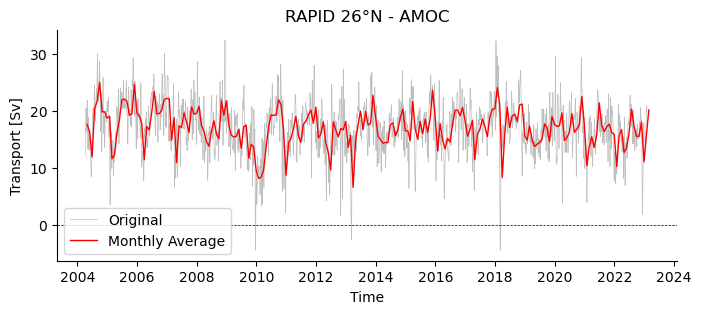

In [4]:
import matplotlib.pyplot as plt

# Resample the dataset to monthly averages
ds_monthly = ds_rapid.resample(TIME="ME").mean()

# Initialize the figure and axes with a specific figure size
fig, axes = plt.subplots(figsize=(8, 3))

# Plot the original dataset in thin grey
plt.plot(
    ds_rapid["TIME"],
    ds_rapid["moc_mar_hc10"],
    color="grey",
    alpha=0.5,
    linewidth=0.5,
    label="Original",
)

# Plot the monthly averaged dataset in thick red
plt.plot(
    ds_monthly["TIME"],
    ds_monthly["moc_mar_hc10"],
    color="red",
    linewidth=1,
    label="Monthly Average",
)

# Add a horizontal line at y=0
plt.axhline(0, color="black", linestyle="--", linewidth=0.5)

# Customize the axes
axes.spines["top"].set_visible(False)
axes.spines["right"].set_visible(False)

# Add title and labels
plt.title("RAPID 26°N - AMOC")
plt.xlabel("Time")
plt.ylabel("Transport [Sv]")
plt.legend()

### Load MOVE 16°N

In [5]:
datasetsMOVE = readers.load_dataset("move")
ds_move = datasetsMOVE[0]
standardMOVE = [
    standardise.standardise_move(ds, ds.attrs["source_file"]) for ds in datasetsMOVE
]

20250418T065959 INFO     setup_logger Logger initialized for array: move, writing to /home/runner/work/amocarray/amocarray/logs/MOVE_20250418T06_read.log


20250418T065959 INFO     load_dataset Loading dataset for array: move


20250418T065959 INFO     read_move Starting to read MOVE dataset


20250418T065959 INFO     resolve_file_path Using cached file: /home/runner/work/amocarray/amocarray/data/OS_MOVE_TRANSPORTS.nc


20250418T065959 INFO     read_move Opening MOVE dataset: /home/runner/work/amocarray/amocarray/data/OS_MOVE_TRANSPORTS.nc


20250418T065959 INFO     read_move Attaching metadata to dataset from file: OS_MOVE_TRANSPORTS.nc


20250418T065959 DEBUG    safe_update_attrs Attribute 'project' already exists in dataset attrs and will not be overwritten.


20250418T065959 DEBUG    safe_update_attrs Attribute 'comment' already exists in dataset attrs and will not be overwritten.


20250418T065959 DEBUG    safe_update_attrs Attribute 'acknowledgement' already exists in dataset attrs and will not be overwritten.


20250418T065959 INFO     read_move Successfully loaded 1 MOVE dataset(s)


20250418T065959 INFO     load_dataset Successfully loaded 1 dataset(s) for array: move


20250418T065959 INFO     _summarise_datasets 
Summary for array 'move':
Total datasets loaded: 1

Dataset 1:
  Source file: OS_MOVE_TRANSPORTS.nc
  Time coverage: 2000-01-01 to 2018-06-30
  Dimensions:
    - TIME: 6756
  Variables:
    - TRANSPORT_TOTAL: shape (6756,)
    - transport_component_internal: shape (6756,)
    - transport_component_internal_offset: shape (6756,)
    - transport_component_boundary: shape (6756,)



20250418T065959 DEBUG    standardise_array Standardising OS_MOVE_TRANSPORTS.nc for MOVE


20250418T065959 DEBUG    merge_metadata_aliases Renaming key 'weblink' → 'web_link'


20250418T065959 DEBUG    merge_metadata_aliases Renaming key 'reference' → 'references'


20250418T065959 DEBUG    merge_metadata_aliases Conflict for 'references' from 'reference'; keeping first value


20250418T065959 DEBUG    merge_metadata_aliases Renaming key 'platform_type' → 'platform'


20250418T065959 DEBUG    _consolidate_contributors Starting _consolidate_contributors with attrs: {'Conventions': 'CF-1.7, ACDD-1.3', 'title': 'Ocean Volume Transport Data from the MOVE Mooring Observations', 'summary': 'MOVE transport estimates dataset from UCSD mooring project', 'date_created': '2019-01-30T18:13:16Z', 'creator_name': 'Matthias Lankhorst', 'creator_url': 'http://orcid.org/0000-0002-4166-4044', 'contributor_name': 'Uwe Send, Matthias Lankhorst', 'contributor_role': 'Principal Investigator, Creator', 'institution': 'Scripps Institution of Oceanography', 'project': 'Meridional Overturning Variability Experiment (MOVE)', 'references': 'http://dx.doi.org/10.1016/j.dsr.2005.12.007 http://dx.doi.org/10.1029/2011GL049801', 'comment': 'Dataset accessed and processed via http://github.com/AMOCcommunity/amocarray', 'license': "Data freely available. User assumes all risk for use of data. Please give due credit to the authors, project, and funding sources when using these data, e

20250418T065959 DEBUG    _consolidate_contributors Email buckets: {}


20250418T065959 DEBUG    _consolidate_contributors URL buckets: {'creator_url': ['http://orcid.org/0000-0002-4166-4044'], 'contributor_url': ['_', 'http://orcid.org/0000-0002-4166-4044']}


20250418T065959 DEBUG    _consolidate_contributors Names: ['Matthias Lankhorst', 'Uwe Send', 'Matthias Lankhorst']; Roles: ['creator', '', '']; Sources: ['creator_name', 'contributor_name', 'contributor_name']


20250418T065959 DEBUG    _consolidate_contributors Set contributor_name='Matthias Lankhorst, Uwe Send, Matthias Lankhorst', contributor_role='Principal Investigator, Creator'


20250418T065959 DEBUG    _consolidate_contributors Aligned contributor_email=', , '


20250418T065959 DEBUG    _consolidate_contributors Aligned contributor_id='http://orcid.org/0000-0002-4166-4044, _, http://orcid.org/0000-0002-4166-4044'


20250418T065959 DEBUG    _consolidate_contributors Matched institution 'Scripps Institution of Oceanography' → 'scripps institution of oceanography' → ''


20250418T065959 DEBUG    _consolidate_contributors Finished _consolidate_contributors: {'Conventions': 'CF-1.7, ACDD-1.3', 'title': 'Ocean Volume Transport Data from the MOVE Mooring Observations', 'summary': 'MOVE transport estimates dataset from UCSD mooring project', 'date_created': '2019-01-30T18:13:16Z', 'contributor_role': 'Principal Investigator, Creator', 'project': 'Meridional Overturning Variability Experiment (MOVE)', 'references': 'http://dx.doi.org/10.1016/j.dsr.2005.12.007 http://dx.doi.org/10.1029/2011GL049801', 'comment': 'Dataset accessed and processed via http://github.com/AMOCcommunity/amocarray', 'license': "Data freely available. User assumes all risk for use of data. Please give due credit to the authors, project, and funding sources when using these data, e.g. by including the 'citation' text provided here.", 'citation': 'Collection of MOVE data was funded by NOAA Research, and carried out by principal investigators Uwe Send and Matthias Lankhorst. MOVE data are 

20250418T065959 DEBUG    normalize_and_add_vocabulary Normalized 'platform': 'Mooring array' → 'mooring'


20250418T065959 DEBUG    normalize_and_add_vocabulary Added vocabulary for 'platform': https://vocab.nerc.ac.uk/collection/L06/


20250418T065959 DEBUG    normalize_and_add_vocabulary Added vocabulary for 'featureType': https://cfconventions.org/cf-conventions/v1.6.0/cf-conventions.html#_features_and_feature_types


Summary for array 'move':
Total datasets loaded: 1

Dataset 1:
  Source file: OS_MOVE_TRANSPORTS.nc
  Time coverage: 2000-01-01 to 2018-06-30
  Dimensions:
    - TIME: 6756
  Variables:
    - TRANSPORT_TOTAL: shape (6756,)
    - transport_component_internal: shape (6756,)
    - transport_component_internal_offset: shape (6756,)
    - transport_component_boundary: shape (6756,)



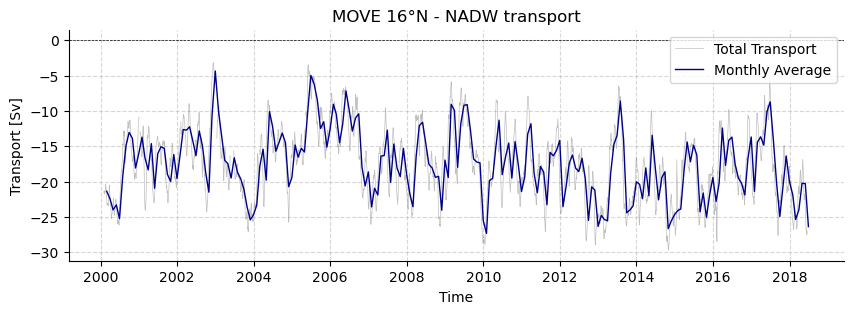

In [6]:
# Resample the dataset to monthly averages
ds_monthly = ds_move.resample(TIME="ME").mean()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 3))

# Plot the total transport from the MOVE dataset in thin grey
ax.plot(
    ds_move["TIME"],
    ds_move["TRANSPORT_TOTAL"],
    color="grey",
    alpha=0.5,
    linewidth=0.5,
    label="Total Transport",
)

# Plot the monthly averaged dataset in thick red
ax.plot(
    ds_monthly["TIME"],
    ds_monthly["TRANSPORT_TOTAL"],
    color="darkblue",
    linewidth=1,
    label="Monthly Average",
)
# Add a horizontal line at y=0
ax.axhline(0, color="black", linestyle="--", linewidth=0.5)

# Customize the axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Add labels, title, and legend
ax.set_title("MOVE 16°N - NADW transport")
ax.set_xlabel("Time")
ax.set_ylabel("Transport [Sv]")
ax.legend()

# Customize the grid
ax.grid(True, linestyle="--", alpha=0.5)

### Load OSNAP

In [7]:
datasetsOSNAP = readers.load_dataset("osnap")
ds_osnap = datasetsOSNAP[0]
standardOSNAP = [
    standardise.standardise_osnap(ds, ds.attrs["source_file"]) for ds in datasetsOSNAP
]

20250418T065959 INFO     setup_logger Logger initialized for array: osnap, writing to /home/runner/work/amocarray/amocarray/logs/OSNAP_20250418T06_read.log


20250418T065959 INFO     load_dataset Loading dataset for array: osnap


20250418T065959 INFO     read_osnap Starting to read OSNAP dataset


20250418T065959 INFO     resolve_file_path Downloading file from https://repository.gatech.edu/bitstreams/e039e311-dd2e-4511-a525-c2fcfb3be85a/download to /home/runner/work/amocarray/amocarray/data


20250418T070002 INFO     read_osnap Opening OSNAP dataset: /home/runner/work/amocarray/amocarray/data/download


20250418T070002 INFO     read_osnap Attaching metadata to dataset from file: OSNAP_MOC_MHT_MFT_TimeSeries_201408_202006_2023.nc


20250418T070002 DEBUG    safe_update_attrs Attribute 'project' already exists in dataset attrs and will not be overwritten.


20250418T070002 INFO     read_osnap Successfully loaded 1 OSNAP dataset(s)


20250418T070002 INFO     load_dataset Successfully loaded 1 dataset(s) for array: osnap


20250418T070002 INFO     _summarise_datasets 
Summary for array 'osnap':
Total datasets loaded: 1

Dataset 1:
  Source file: OSNAP_MOC_MHT_MFT_TimeSeries_201408_202006_2023.nc
  Time coverage: 2014-08-01 to 2020-06-01
  Dimensions:
    - TIME: 71
  Variables:
    - MOC_ALL: shape (71,)
    - MOC_ALL_ERR: shape (71,)
    - MOC_EAST: shape (71,)
    - MOC_EAST_ERR: shape (71,)
    - MOC_WEST: shape (71,)
    - MOC_WEST_ERR: shape (71,)
    - MHT_ALL: shape (71,)
    - MHT_ALL_ERR: shape (71,)
    - MHT_EAST: shape (71,)
    - MHT_EAST_ERR: shape (71,)
    - MHT_WEST: shape (71,)
    - MHT_WEST_ERR: shape (71,)
    - MFT_ALL: shape (71,)
    - MFT_ALL_ERR: shape (71,)
    - MFT_EAST: shape (71,)
    - MFT_EAST_ERR: shape (71,)
    - MFT_WEST: shape (71,)
    - MFT_WEST_ERR: shape (71,)



20250418T070002 DEBUG    standardise_array Standardising OSNAP_MOC_MHT_MFT_TimeSeries_201408_202006_2023.nc for OSNAP


20250418T070002 DEBUG    merge_metadata_aliases Renaming key 'weblink' → 'web_link'


20250418T070002 DEBUG    merge_metadata_aliases Renaming key 'platform_type' → 'platform'


20250418T070002 DEBUG    _consolidate_contributors Starting _consolidate_contributors with attrs: {'title': 'OSNAP MOC MHT MFT time series (2014-2020)', 'project': 'Overturning in the Subpolar North Atlantic Program (OSNAP)', 'contributor_name': 'Yao Fu, M. Susan Lozier, Tiago Carrilho Biló, Amy S. Bower, Stuart A. Cunningham, Frédéric Cyr, M. Femke de Jong, Brad deYoung, Lewis Drysdale, Neil Fraser, Nora Fried, Heather H. Furey, Guoqi Han, Patricia Handmann, N. Penny Holliday, James Holte, Mark E. Inall, William E. Johns, Sam Jones, Johannes Karstensen, Feili Li, Astrid Pacini, Robert S. Pickart, Darren Rayner, Fiammetta Straneo, Igor Yashayaev', 'contributor_role': 'data design, collection and/or processing', 'contributor_institution': 'Georgia Institute of Technology, USA; National Oceanography Centre at Southampton, UK; Woods Hole Oceanographic Institution, USA; Scottish Association for Marine Science, UK; Royal Netherlands Institute for Sea Research and Utrecht University, Netherl

20250418T070002 DEBUG    _consolidate_contributors Email buckets: {'publisher_email': ['susan.lozier@gatech.edu', 'yaofu@gatech.edu']}


20250418T070002 DEBUG    _consolidate_contributors URL buckets: {}


20250418T070002 DEBUG    _consolidate_contributors Names: ['Yao Fu', 'M. Susan Lozier', 'Tiago Carrilho Biló', 'Amy S. Bower', 'Stuart A. Cunningham', 'Frédéric Cyr', 'M. Femke de Jong', 'Brad deYoung', 'Lewis Drysdale', 'Neil Fraser', 'Nora Fried', 'Heather H. Furey', 'Guoqi Han', 'Patricia Handmann', 'N. Penny Holliday', 'James Holte', 'Mark E. Inall', 'William E. Johns', 'Sam Jones', 'Johannes Karstensen', 'Feili Li', 'Astrid Pacini', 'Robert S. Pickart', 'Darren Rayner', 'Fiammetta Straneo', 'Igor Yashayaev', 'M. Susan Lozier', 'Yao Fu', 'OSNAP investigators']; Roles: ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'publisher', 'publisher', 'creator']; Sources: ['contributor_name', 'contributor_name', 'contributor_name', 'contributor_name', 'contributor_name', 'contributor_name', 'contributor_name', 'contributor_name', 'contributor_name', 'contributor_name', 'contributor_name', 'contributor_name', 'contributor_name', 'contrib

20250418T070002 DEBUG    _consolidate_contributors Set contributor_name='Yao Fu, M. Susan Lozier, Tiago Carrilho Biló, Amy S. Bower, Stuart A. Cunningham, Frédéric Cyr, M. Femke de Jong, Brad deYoung, Lewis Drysdale, Neil Fraser, Nora Fried, Heather H. Furey, Guoqi Han, Patricia Handmann, N. Penny Holliday, James Holte, Mark E. Inall, William E. Johns, Sam Jones, Johannes Karstensen, Feili Li, Astrid Pacini, Robert S. Pickart, Darren Rayner, Fiammetta Straneo, Igor Yashayaev, M. Susan Lozier, Yao Fu, OSNAP investigators', contributor_role='data design, collection and/or processing'


20250418T070002 DEBUG    _consolidate_contributors Aligned contributor_email=', , , , , , , , , , , , , , , , , , , , , , , , , , susan.lozier@gatech.edu, yaofu@gatech.edu, '


20250418T070002 DEBUG    _consolidate_contributors Aligned contributor_id=', , , , , , , , , , , , , , , , , , , , , , , , , , , , '


20250418T070002 DEBUG    _consolidate_contributors Matched institution 'Georgia Institute of Technology, USA' → 'georgia institute of technology, usa' → ''


20250418T070002 DEBUG    _consolidate_contributors Matched institution 'National Oceanography Centre at Southampton, UK' → 'national oceanography centre at southampton, uk' → ''


20250418T070002 DEBUG    _consolidate_contributors Matched institution 'Woods Hole Oceanographic Institution, USA' → 'woods hole oceanographic institution, usa' → ''


20250418T070002 DEBUG    _consolidate_contributors Matched institution 'Scottish Association for Marine Science, UK' → 'scottish association for marine science, uk' → ''


20250418T070002 DEBUG    _consolidate_contributors Matched institution 'Royal Netherlands Institute for Sea Research and Utrecht University, Netherlands' → 'royal netherlands institute for sea research and utrecht university, netherlands' → ''


20250418T070002 DEBUG    _consolidate_contributors Matched institution 'Memorial University, Canada' → 'memorial university, canada' → ''


20250418T070002 DEBUG    _consolidate_contributors Matched institution 'Fisheries and Oceans Canada Northwest Atlantic Fisheries Centre and Institute of Ocean Sciences, Canada' → 'fisheries and oceans canada northwest atlantic fisheries centre and institute of ocean sciences, canada' → ''


20250418T070002 DEBUG    _consolidate_contributors Matched institution 'Scripps Institution of Oceanography, UCSD, USA' → 'scripps institution of oceanography, ucsd, usa' → ''


20250418T070002 DEBUG    _consolidate_contributors Matched institution 'Edinburgh University, UK' → 'edinburgh university, uk' → ''


20250418T070002 DEBUG    _consolidate_contributors Matched institution 'University of Miami, USA' → 'university of miami, usa' → ''


20250418T070002 DEBUG    _consolidate_contributors Matched institution 'GEOMAR Helmholtz Centre for Ocean Research Kiel, Germany' → 'geomar helmholtz centre for ocean research kiel, germany' → ''


20250418T070002 DEBUG    _consolidate_contributors Matched institution 'Bedford Institute of Oceanography, Canada' → 'bedford institute of oceanography, canada' → ''


20250418T070002 DEBUG    _consolidate_contributors Matched institution 'Xiamen University, China' → 'xiamen university, china' → ''


20250418T070002 DEBUG    _consolidate_contributors Matched institution 'Multiple contributing institutions (US, UK, Germany, Netherlands, Canada, France, China)' → 'multiple contributing institutions (us, uk, germany, netherlands, canada, france, china)' → ''


20250418T070002 DEBUG    _consolidate_contributors Finished _consolidate_contributors: {'title': 'OSNAP MOC MHT MFT time series (2014-2020)', 'project': 'Overturning in the Subpolar North Atlantic Program (OSNAP)', 'contributor_role': 'data design, collection and/or processing', 'data_assembly_center': 'Georgia Institute of Technology', 'references': 'Lozier et al. (2019), Science, doi:10.1126/science.aau6592; Li et al. (2017), JTECH, doi:10.1175/JTECH-D-16-0247.1; Li et al. (2021), Nature Communications, doi:10.1038/s41467-021-23350-2; Fu et al. (2023), Communications Earth & Environment, doi:10.1038/s43247-023-00848-9', 'citation': 'OSNAP data were collected and made freely available by the OSNAP (Overturning in the Subpolar North Atlantic Program) project and all the national programs that contribute to it (www.o-snap.org)', 'date_created': '2023-04-24 11:33:07', 'time_coverage_start': '2014-08-01', 'time_coverage_end': '2020-06-30', 'source_file': 'OSNAP_MOC_MHT_MFT_TimeSeries_2014

20250418T070002 DEBUG    normalize_and_add_vocabulary Normalized 'platform': 'Mooring array' → 'mooring'


20250418T070002 DEBUG    normalize_and_add_vocabulary Added vocabulary for 'platform': https://vocab.nerc.ac.uk/collection/L06/


20250418T070002 DEBUG    normalize_and_add_vocabulary Added vocabulary for 'featureType': https://cfconventions.org/cf-conventions/v1.6.0/cf-conventions.html#_features_and_feature_types


Summary for array 'osnap':
Total datasets loaded: 1

Dataset 1:
  Source file: OSNAP_MOC_MHT_MFT_TimeSeries_201408_202006_2023.nc
  Time coverage: 2014-08-01 to 2020-06-01
  Dimensions:
    - TIME: 71
  Variables:
    - MOC_ALL: shape (71,)
    - MOC_ALL_ERR: shape (71,)
    - MOC_EAST: shape (71,)
    - MOC_EAST_ERR: shape (71,)
    - MOC_WEST: shape (71,)
    - MOC_WEST_ERR: shape (71,)
    - MHT_ALL: shape (71,)
    - MHT_ALL_ERR: shape (71,)
    - MHT_EAST: shape (71,)
    - MHT_EAST_ERR: shape (71,)
    - MHT_WEST: shape (71,)
    - MHT_WEST_ERR: shape (71,)
    - MFT_ALL: shape (71,)
    - MFT_ALL_ERR: shape (71,)
    - MFT_EAST: shape (71,)
    - MFT_EAST_ERR: shape (71,)
    - MFT_WEST: shape (71,)
    - MFT_WEST_ERR: shape (71,)



### Load SAMBA 34.5°S

In [8]:
datasetsSAMBA = readers.load_dataset("SAMBA")
standardSAMBA = [
    standardise.standardise_samba(ds, ds.attrs["source_file"]) for ds in datasetsSAMBA
]


20250418T070002 INFO     setup_logger Logger initialized for array: SAMBA, writing to /home/runner/work/amocarray/amocarray/logs/SAMBA_20250418T07_read.log


20250418T070002 INFO     load_dataset Loading dataset for array: SAMBA


20250418T070002 INFO     read_samba Starting to read SAMBA dataset


20250418T070002 INFO     resolve_file_path Using cached file: /home/runner/work/amocarray/amocarray/data/Upper_Abyssal_Transport_Anomalies.txt


20250418T070002 INFO     read_samba Attaching metadata to SAMBA dataset from file: Upper_Abyssal_Transport_Anomalies.txt


20250418T070002 INFO     resolve_file_path Using cached file: /home/runner/work/amocarray/amocarray/data/MOC_TotalAnomaly_and_constituents.asc


20250418T070002 INFO     read_samba Attaching metadata to SAMBA dataset from file: MOC_TotalAnomaly_and_constituents.asc


20250418T070002 INFO     read_samba Successfully loaded 2 SAMBA dataset(s)


20250418T070002 INFO     load_dataset Successfully loaded 2 dataset(s) for array: SAMBA


20250418T070002 INFO     _summarise_datasets 
Summary for array 'SAMBA':
Total datasets loaded: 2

Dataset 1:
  Source file: Upper_Abyssal_Transport_Anomalies.txt
  Time coverage: 2013-09-12 to 2017-07-16
  Dimensions:
    - TIME: 1404
  Variables:
    - Upper-cell volume transport anomaly (relative to record-length average of 17.3 Sv): shape (1404,)
    - Abyssal-cell volume transport anomaly (relative to record-length average of 7.8 Sv): shape (1404,)

Dataset 2:
  Source file: MOC_TotalAnomaly_and_constituents.asc
  Time coverage: 2009-03-19 to 2017-04-29
  Dimensions:
    - TIME: 2964
  Variables:
    - Total MOC anomaly (relative to record-length average of 14.7 Sv): shape (2964,)
    - Relative (density gradient) contribution to the MOC anomaly: shape (2964,)
    - Reference (bottom pressure gradient) contribution to the MOC anomaly: shape (2964,)
    - Ekman (wind) contribution to the MOC anomaly: shape (2964,)
    - Western density contribution to the MOC anomaly: shape (2964,)

20250418T070002 DEBUG    standardise_array Standardising Upper_Abyssal_Transport_Anomalies.txt for SAMBA


20250418T070002 DEBUG    merge_metadata_aliases Renaming key 'weblink' → 'web_link'


20250418T070002 DEBUG    merge_metadata_aliases Renaming key 'platform_type' → 'platform'


20250418T070002 DEBUG    _consolidate_contributors Starting _consolidate_contributors with attrs: {'source_file': 'Upper_Abyssal_Transport_Anomalies.txt', 'source_path': '/home/runner/work/amocarray/amocarray/data/Upper_Abyssal_Transport_Anomalies.txt', 'description': 'SAMBA 34S transport estimates dataset', 'project': 'South Atlantic MOC Basin-wide Array (SAMBA)', 'web_link': 'https://www.aoml.noaa.gov/phod/samoc', 'comment': 'Dataset accessed and processed via http://github.com/AMOCcommunity/amocarray', 'acknowledgement': 'M. Kersalé et al., Highly variable upper and abyssal overturning cells in the South Atlantic. Sci. Adv. 6, eaba7573 (2020). DOI: 10.1126/sciadv.aba7573', 'data_product': 'Daily volume transport anomaly estimates for the upper and abyssal cells of the MOC', 'program': 'SAMBA', 'license': 'CC-BY 4.0', 'featureType': 'timeSeries', 'Conventions': 'CF-1.8, ACDD-1.3', 'time_coverage_start': '2001-06-01', 'time_coverage_end': '2023-12-31', 'platform': 'Mooring array', 'su

20250418T070002 DEBUG    _consolidate_contributors Email buckets: {}


20250418T070002 DEBUG    _consolidate_contributors URL buckets: {}


20250418T070002 DEBUG    _consolidate_contributors Names: []; Roles: []; Sources: []


20250418T070002 DEBUG    _consolidate_contributors Finished _consolidate_contributors: {'source_file': 'Upper_Abyssal_Transport_Anomalies.txt', 'source_path': '/home/runner/work/amocarray/amocarray/data/Upper_Abyssal_Transport_Anomalies.txt', 'description': 'SAMBA 34S transport estimates dataset', 'project': 'South Atlantic MOC Basin-wide Array (SAMBA)', 'web_link': 'https://www.aoml.noaa.gov/phod/samoc', 'comment': 'Dataset accessed and processed via http://github.com/AMOCcommunity/amocarray', 'acknowledgement': 'M. Kersalé et al., Highly variable upper and abyssal overturning cells in the South Atlantic. Sci. Adv. 6, eaba7573 (2020). DOI: 10.1126/sciadv.aba7573', 'data_product': 'Daily volume transport anomaly estimates for the upper and abyssal cells of the MOC', 'program': 'SAMBA', 'license': 'CC-BY 4.0', 'featureType': 'timeSeries', 'Conventions': 'CF-1.8, ACDD-1.3', 'time_coverage_start': '2001-06-01', 'time_coverage_end': '2023-12-31', 'platform': 'Mooring array', 'summary': 'SA

20250418T070002 DEBUG    normalize_and_add_vocabulary Normalized 'platform': 'Mooring array' → 'mooring'


20250418T070002 DEBUG    normalize_and_add_vocabulary Added vocabulary for 'platform': https://vocab.nerc.ac.uk/collection/L06/


20250418T070002 DEBUG    normalize_and_add_vocabulary Added vocabulary for 'featureType': https://cfconventions.org/cf-conventions/v1.6.0/cf-conventions.html#_features_and_feature_types


20250418T070002 DEBUG    standardise_array Standardising MOC_TotalAnomaly_and_constituents.asc for SAMBA


20250418T070002 DEBUG    merge_metadata_aliases Renaming key 'weblink' → 'web_link'


20250418T070002 DEBUG    merge_metadata_aliases Renaming key 'platform_type' → 'platform'


20250418T070002 DEBUG    _consolidate_contributors Starting _consolidate_contributors with attrs: {'source_file': 'MOC_TotalAnomaly_and_constituents.asc', 'source_path': '/home/runner/work/amocarray/amocarray/data/MOC_TotalAnomaly_and_constituents.asc', 'description': 'SAMBA 34S transport estimates dataset', 'project': 'South Atlantic MOC Basin-wide Array (SAMBA)', 'web_link': 'https://www.aoml.noaa.gov/phod/samoc', 'comment': 'Dataset accessed and processed via http://github.com/AMOCcommunity/amocarray', 'acknowledgement': 'Meinen, C. S., Speich, S., Piola, A. R., Ansorge, I., Campos, E., Kersalé, M., et al. (2018). Meridional overturning circulation transport variability at 34.5°S during 2009–2017: Baroclinic and barotropic flows and the dueling influence of the boundaries. Geophysical Research Letters, 45, 4180–4188. https://doi.org/10.1029/2018GL077408', 'data_product': 'Daily travel time values, calibrated to a nominal pressure of 1000 dbar, and bottom pressures from the two PIES/

20250418T070002 DEBUG    _consolidate_contributors Email buckets: {}


20250418T070002 DEBUG    _consolidate_contributors URL buckets: {}


20250418T070002 DEBUG    _consolidate_contributors Names: []; Roles: []; Sources: []


20250418T070002 DEBUG    _consolidate_contributors Finished _consolidate_contributors: {'source_file': 'MOC_TotalAnomaly_and_constituents.asc', 'source_path': '/home/runner/work/amocarray/amocarray/data/MOC_TotalAnomaly_and_constituents.asc', 'description': 'SAMBA 34S transport estimates dataset', 'project': 'South Atlantic MOC Basin-wide Array (SAMBA)', 'web_link': 'https://www.aoml.noaa.gov/phod/samoc', 'comment': 'Dataset accessed and processed via http://github.com/AMOCcommunity/amocarray', 'acknowledgement': 'Meinen, C. S., Speich, S., Piola, A. R., Ansorge, I., Campos, E., Kersalé, M., et al. (2018). Meridional overturning circulation transport variability at 34.5°S during 2009–2017: Baroclinic and barotropic flows and the dueling influence of the boundaries. Geophysical Research Letters, 45, 4180–4188. https://doi.org/10.1029/2018GL077408', 'data_product': 'Daily travel time values, calibrated to a nominal pressure of 1000 dbar, and bottom pressures from the two PIES/CPIES moori

20250418T070002 DEBUG    normalize_and_add_vocabulary Normalized 'platform': 'Mooring array' → 'mooring'


20250418T070002 DEBUG    normalize_and_add_vocabulary Added vocabulary for 'platform': https://vocab.nerc.ac.uk/collection/L06/


20250418T070002 DEBUG    normalize_and_add_vocabulary Added vocabulary for 'featureType': https://cfconventions.org/cf-conventions/v1.6.0/cf-conventions.html#_features_and_feature_types


Summary for array 'SAMBA':
Total datasets loaded: 2

Dataset 1:
  Source file: Upper_Abyssal_Transport_Anomalies.txt
  Time coverage: 2013-09-12 to 2017-07-16
  Dimensions:
    - TIME: 1404
  Variables:
    - Upper-cell volume transport anomaly (relative to record-length average of 17.3 Sv): shape (1404,)
    - Abyssal-cell volume transport anomaly (relative to record-length average of 7.8 Sv): shape (1404,)

Dataset 2:
  Source file: MOC_TotalAnomaly_and_constituents.asc
  Time coverage: 2009-03-19 to 2017-04-29
  Dimensions:
    - TIME: 2964
  Variables:
    - Total MOC anomaly (relative to record-length average of 14.7 Sv): shape (2964,)
    - Relative (density gradient) contribution to the MOC anomaly: shape (2964,)
    - Reference (bottom pressure gradient) contribution to the MOC anomaly: shape (2964,)
    - Ekman (wind) contribution to the MOC anomaly: shape (2964,)
    - Western density contribution to the MOC anomaly: shape (2964,)
    - Eastern density contribution to the MOC

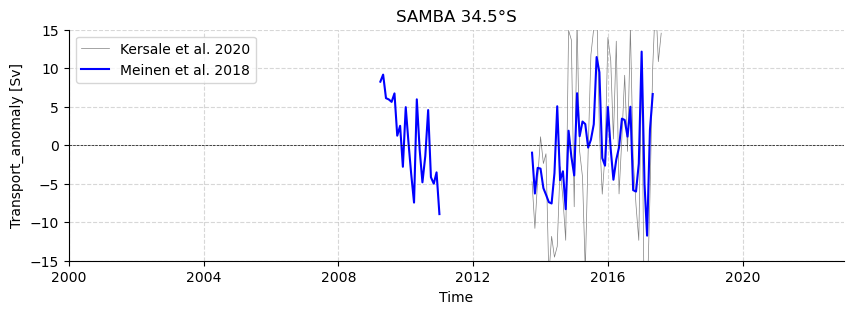

In [9]:
# Extract the upper and abyssal transport data
ds = standardSAMBA[0]
upper_transport = ds["UPPER_TRANSPORT"]
ds2 = standardSAMBA[1]
moc_meinen = ds2["MOC"]


# Resample the dataset to monthly averages
upper_transport_monthly = upper_transport.resample(TIME="ME").mean()
moc_meinen_monthly = moc_meinen.resample(TIME="ME").mean()
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 3))

# Plot the original upper transport in thin blue
ax.plot(
    upper_transport_monthly["TIME"],
    upper_transport_monthly,
    color="grey",
    linewidth=0.5,
    label="Kersale et al. 2020",
)
ax.plot(
    moc_meinen_monthly["TIME"],
    moc_meinen_monthly,
    color="blue",
    alpha=1,
    linewidth=1.5,
    label="Meinen et al. 2018",
)


# Add a horizontal line at y=0
ax.axhline(0, color="black", linestyle="--", linewidth=0.5)

# Customize the axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Add labels, title, and legend
ax.set_title("SAMBA 34.5°S")
ax.set_xlabel("Time")
ax.set_ylabel(
    f"{upper_transport.attrs['standard_name']} [{upper_transport.attrs['units']}]"
)
ax.legend()
# Set the x-axis limits from 2000 to 2022
import pandas as pd

ax.set_xlim([pd.Timestamp("2000-01-01"), pd.Timestamp("2022-12-31")])

# Set the y-axis limits from -15 to 15
ax.set_ylim([-15, 15])

# Customize the grid
ax.grid(True, linestyle="--", alpha=0.5)

(<Figure size 600x800 with 4 Axes>,
 array([<Axes: title={'center': 'OSNAP'}, ylabel='Transport [Sv]'>,
        <Axes: title={'center': 'RAPID 26°N'}, ylabel='Transport [Sv]'>,
        <Axes: title={'center': 'MOVE 16°N'}, ylabel='Transport [Sv]'>,
        <Axes: title={'center': 'SAMBA 34.5°S'}, xlabel='Time', ylabel='Transport [Sv]'>],
       dtype=object))

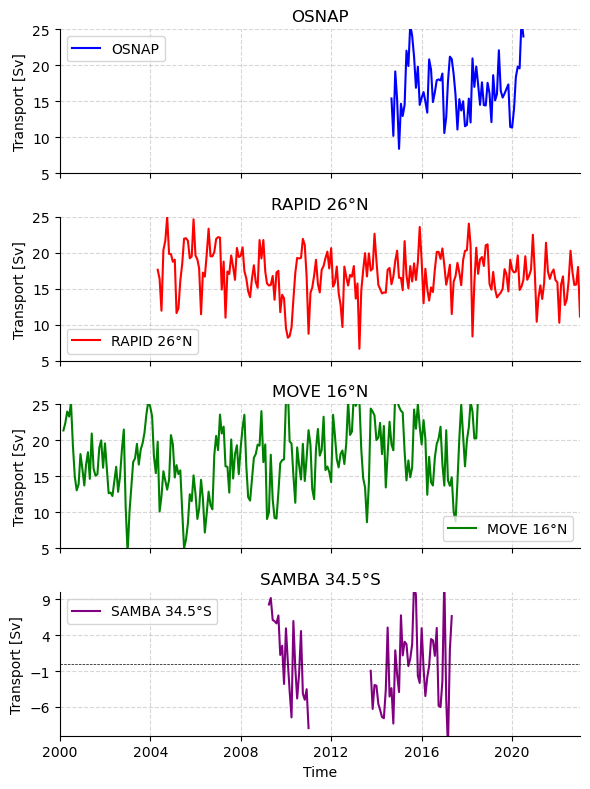

In [10]:
plotters.plot_monthly_anomalies(
    osnap_data=ds_osnap["MOC_ALL"],
    rapid_data=ds_rapid["moc_mar_hc10"],
    move_data=-ds_move["TRANSPORT_TOTAL"],
    samba_data=standardSAMBA[1]["MOC"],
    osnap_label="OSNAP",
    rapid_label="RAPID 26°N",
    move_label="MOVE 16°N",
    samba_label="SAMBA 34.5°S",
)